<a href="https://colab.research.google.com/github/Susrinivas/Python-Stats-and-Visualization/blob/main/Assignment_05/Part_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# missing data

In [1]:
import numpy as np
import pandas as pd

In [2]:
falsy_values = (0, False, None, '', [], {})

In [3]:
any(falsy_values)

False

In [4]:
np.nan

nan

In [5]:
3 + np.nan

nan

In [6]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [7]:
a.sum()

nan

In [8]:
a.mean()

nan

In [9]:
a = np.array([1, 2, 3, np.nan, None, 4], dtype='float')

In [10]:
a

array([ 1.,  2.,  3., nan, nan,  4.])

In [11]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [12]:
a.mean()

nan

In [13]:
a.sum()

nan

In [14]:
np.inf

inf

In [15]:
3 + np.inf

inf

In [16]:
np.inf / 3

inf

In [17]:
np.inf / np.inf

nan

In [18]:
b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [19]:
b.sum()

nan

In [20]:
np.isnan(np.nan)

True

In [21]:
np.isinf(np.inf)

True

In [22]:
np.isfinite(np.nan), np.isfinite(np.inf)

(False, False)

In [23]:
np.isnan(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False,  True, False, False])

In [24]:
np.isinf(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False, False,  True, False])

In [25]:
np.isfinite(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([ True,  True,  True, False, False,  True])

In [26]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [27]:
a[~np.isnan(a)]

array([1., 2., 3., 4.])

In [28]:
a[np.isfinite(a)]

array([1., 2., 3., 4.])

In [29]:
a[np.isfinite(a)].sum()

10.0

In [30]:
a[np.isfinite(a)].mean()

2.5

# cleaning not null values

In [31]:
import numpy as np
import pandas as pd

In [32]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [33]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [34]:
df['Sex'].value_counts()

F    2
M    1
D    1
?    1
Name: Sex, dtype: int64

In [35]:
df['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [36]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [37]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [38]:
df[df['Age'] > 100]

,Sex,Age
3,D,290


In [39]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10

In [40]:
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


In [41]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [42]:
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [43]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [44]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [45]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [46]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [47]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [48]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

In [49]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [50]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [51]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [52]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [53]:
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [54]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [55]:
players.drop_duplicates(subset=['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [56]:
players.drop_duplicates(subset=['Name'], keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [57]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [58]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [59]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [60]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [61]:
df = df['Data'].str.split('_', expand=True)

In [62]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

In [63]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [64]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [65]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [66]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [67]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [68]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

# More visualizations


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
x = np.arange(-10, 11)

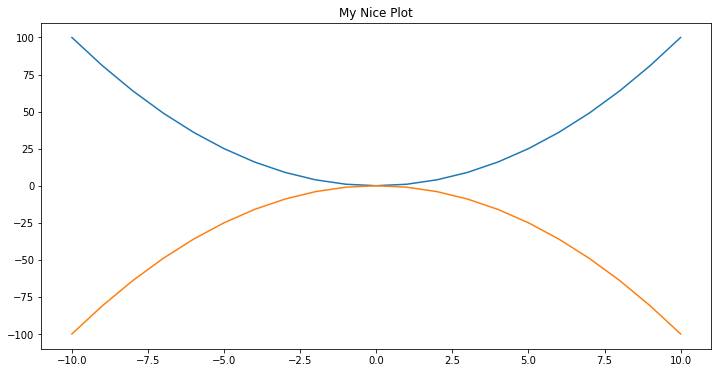

In [71]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

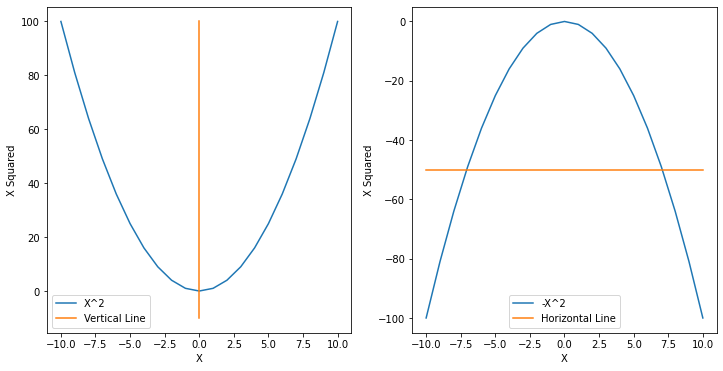

In [72]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

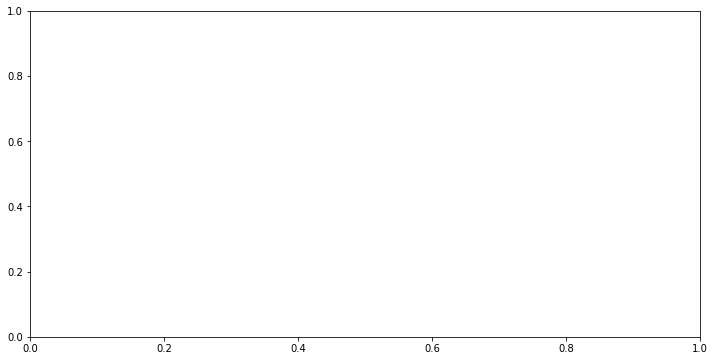

In [73]:
fig, axes = plt.subplots(figsize=(12, 6))

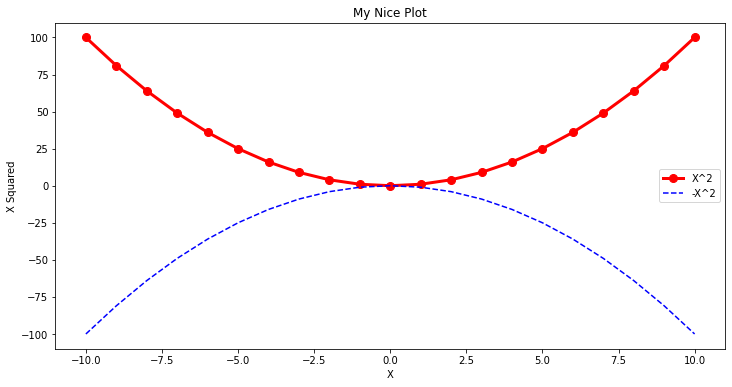

In [74]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

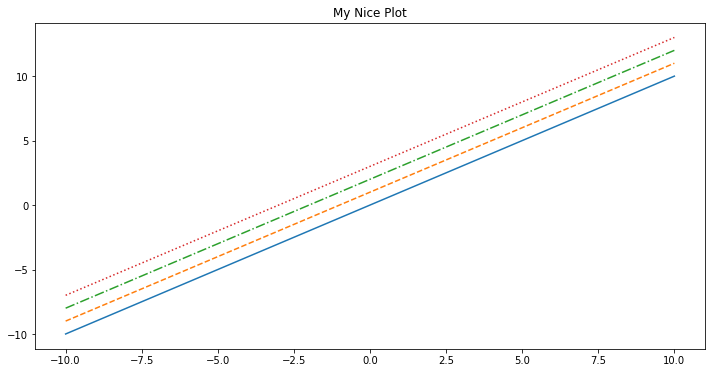

In [75]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

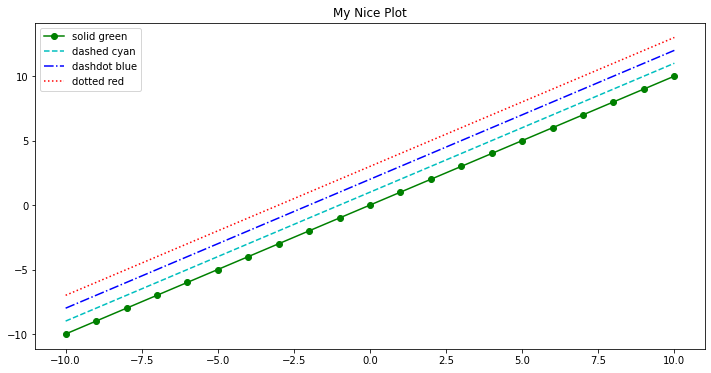

In [76]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

In [77]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [78]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))


Line styles: ['_', '-', '--', ':']


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9950099290>)

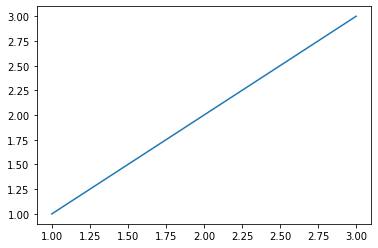

In [79]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

(<Figure size 1008x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9950091850>,
       dtype=object))

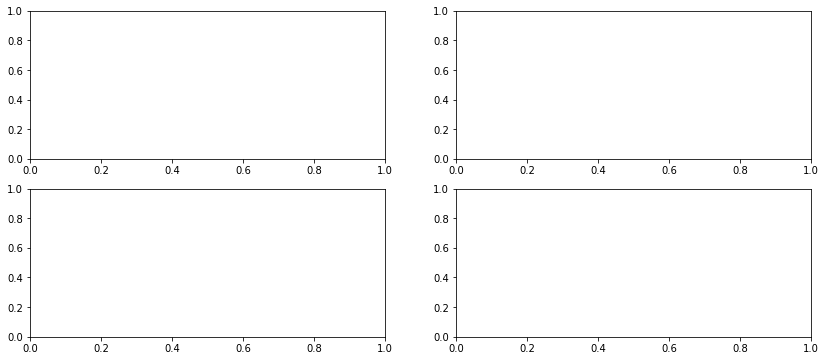

In [80]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

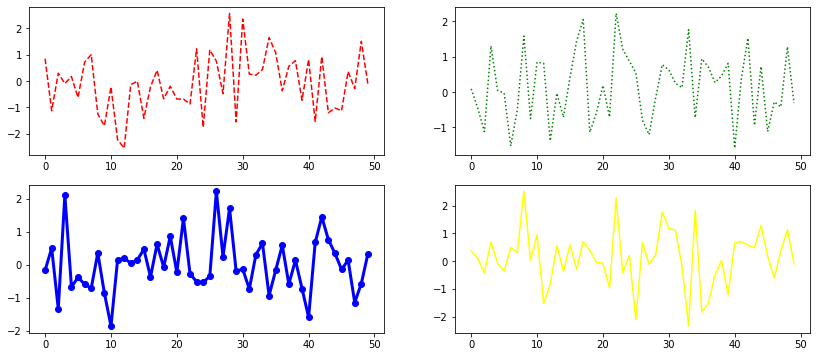

In [81]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

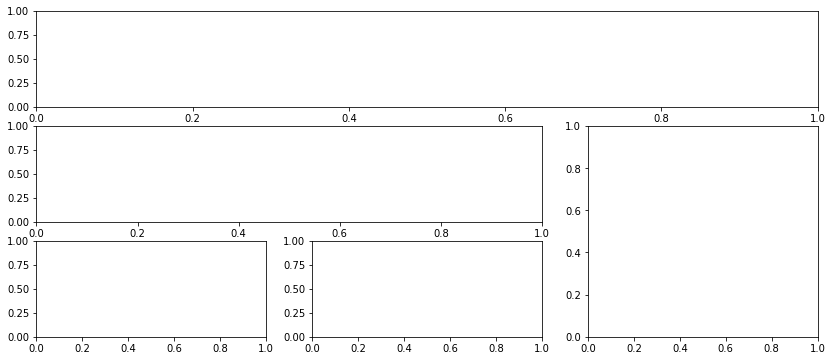

In [82]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

In [83]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

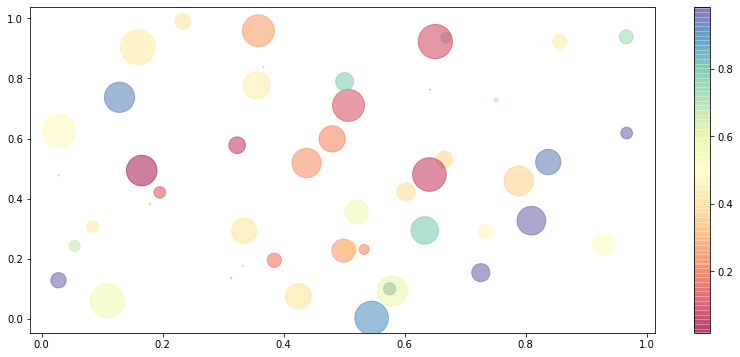

In [84]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

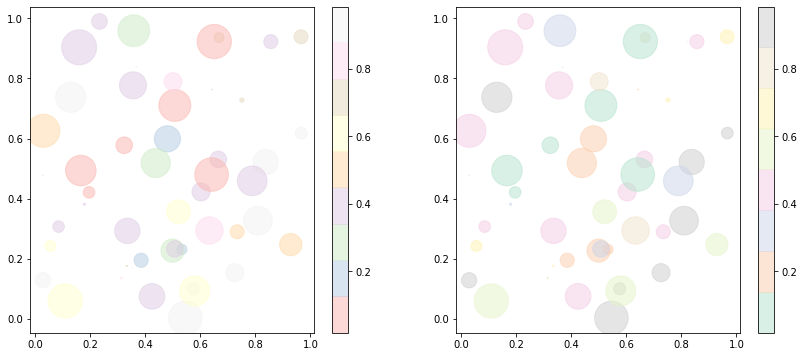

In [85]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

In [86]:
values = np.random.randn(1000)

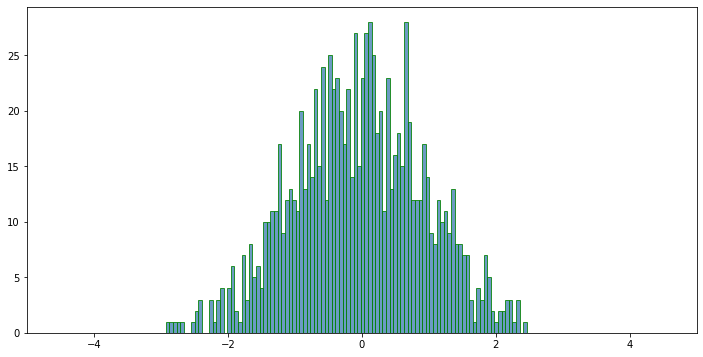

In [87]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [88]:
fig.savefig('hist.png')

In [89]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

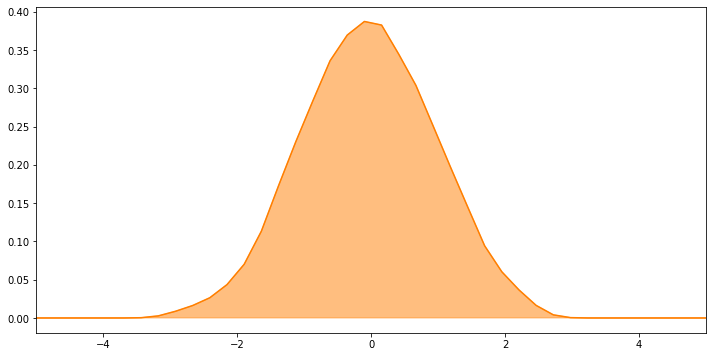

In [90]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()


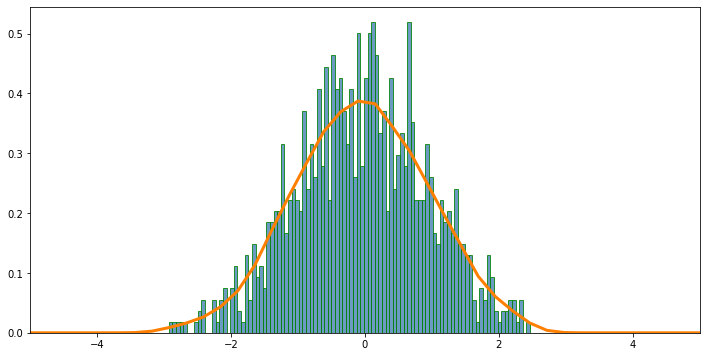

In [91]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [92]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

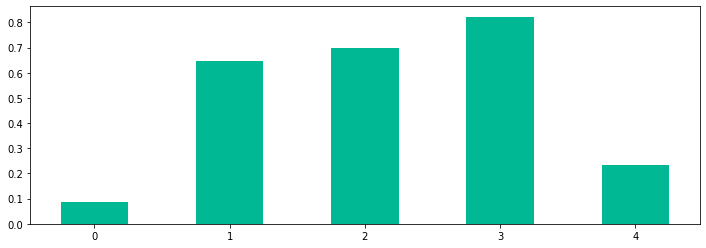

In [93]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

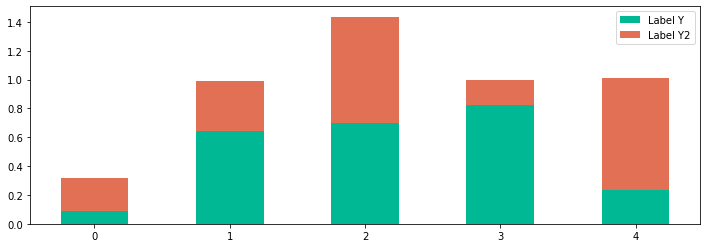

In [94]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

In [95]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 6., 4., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <a list of 10 Patch objects>)

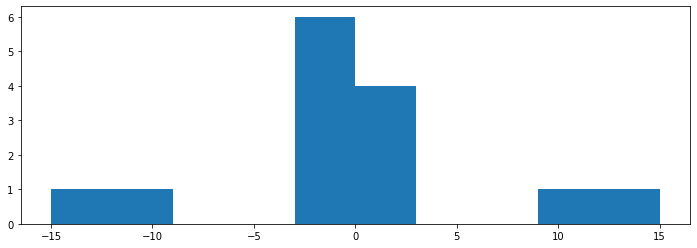

In [96]:
plt.figure(figsize=(12, 4))

plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9942696b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9942696ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99426e7b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f99426a8210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f994269e9d0>],
 'means': []}

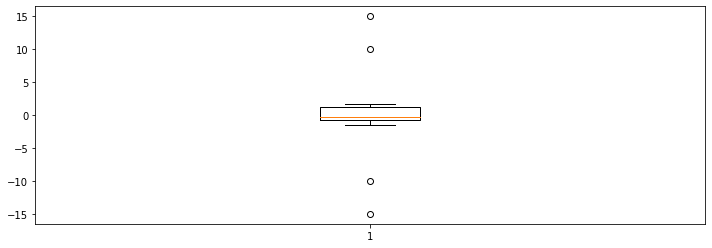

In [97]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)